<a href="https://colab.research.google.com/github/ricrichardthomas1/info501/blob/main/pyTesseract%26YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTesseract + YOLO for table extraction**  

This notebook uses the pyTesseract + YOLO model method of table extraction from scanned pdfs

[Source: Medium article](https://medium.com/mlearning-ai/document-intelligence-series-part-1-table-detection-with-yolo-1fa0a198fd7#:~:text=In%20order%20to%20extract%20the,to%20pytesseract%20for%20information%20extraction.)

# Installing dependencies

In [2]:
# Installing tesseract in system
!sudo apt install tesseract-ocr

# Installing required dependencies
!pip install pytesseract transformers ultralyticsplus==0.0.23 ultralytics==8.0.21

!pip install pdf2image # need it to convert pdfs to image files
!apt-get update
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (26.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

# Importing Packages

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import pytesseract
from pytesseract import Output

from ultralyticsplus import YOLO, render_result
from PIL import Image
import os
import cv2

# Loading Image

In [ ]:
from pdf2image import convert_from_path
images = convert_from_path('/content/sample.pdf')
!mkdir pages
for i in range(len(images)):
  images[i].save('pages/page'+str(i)+'.jpg', 'JPEG')

In [ ]:
## Image downloaded from below link
# https://stackoverflow.com/questions/50829874/how-to-find-table-like-structure-in-image

image = './pages/page0.jpg'

img = Image.open(image)
img

# Initialize YOLOv8m model

In [ ]:
# load model
model = YOLO('keremberke/yolov8m-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# Detect Table

In [ ]:
# perform inference
results = model.predict(img)

# observe results
print('Boxes: ', results[0].boxes)
render = render_result(model=model, image=img, result=results[0])
render

# Crop Table

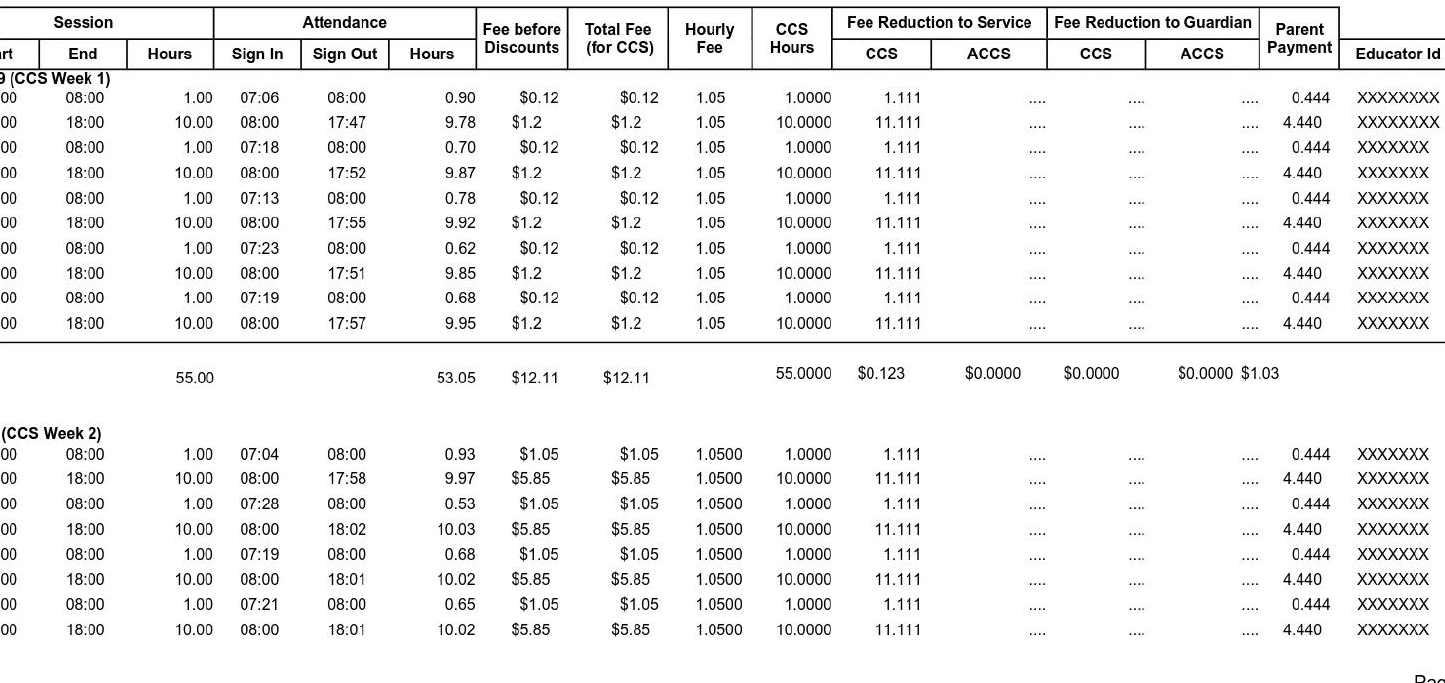

In [ ]:
x1, y1, x2, y2, _, _ = tuple(int(item) for item in results[0].boxes.data.numpy()[0])
img = np.array(Image.open(image))
#cropping
cropped_image = img[y1:y2, x1:x2]
cropped_image = Image.fromarray(cropped_image)
cropped_image

# Perform OCR

In [ ]:
#ext_df = pytesseract.image_to_data(cropped_image, output_type=Output.DATAFRAME, config="--psm 6 --oem 3")
#ext_df
#ext_boxes = pytesseract.image_to_boxes(cropped_image, output_type=Output.DICT, config="--psm 6 --oem 3")
ext_boxes['right'][:10]

[63, 63, 81, 93, 101, 103, 492, 492, 509, 520]

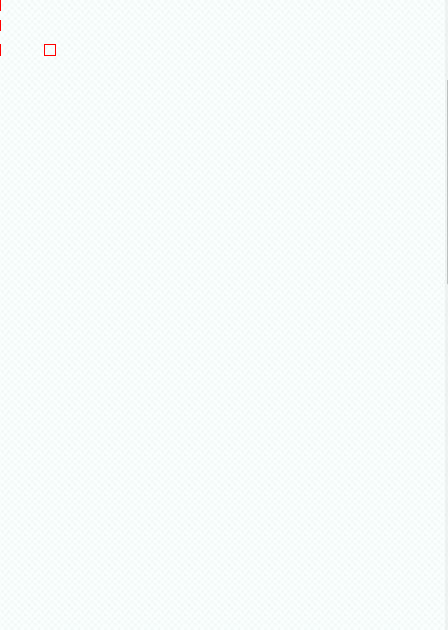

In [ ]:
#h_boxes = []
#v_boxes = []

#simage = cv2.imread('./canvas.JPG')
cv2.rectangle(simage, (0,0), (0,10),(255,0,0),1)
#cv2.imwrite('./oimage.jpg', simage)
#oimage = cv2.imread('./oimage.jpg')
Image.fromarray(simage)

In [1]:
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)


NameError: ignored

In [ ]:
#pytesseract.pytesseract.file_to_dict(pytesseract.image_to_string(cropped_image, output_type=Output.STRING, config="--psm 6 --oem 3"), '\t', 0)
!pip show opencv-python

Name: opencv-python
Version: 4.7.0.72
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: dopamine-rl, imgaug, sahi, ultralytics
